# Salary prediction

In [1]:
## importing laibaries 
import pandas as pd
import numpy as np

In [2]:
## loading the data set
df_train=pd.read_csv('SalaryData_train.csv')
df_test=pd.read_csv('SalaryData_test.csv')

In [3]:
## checking the dataset
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
## checking shape of the dataset
df_train.shape

(30161, 14)

In [6]:
df_test.shape

(15060, 14)

# EDA

In [7]:
df_train['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

### converting catagorical value into numerical by using one hot encoding.

In [8]:
df_train1=pd.get_dummies(df_train,columns=['workclass'])
df_test1=pd.get_dummies(df_test,columns=['workclass'])

In [9]:
df_train1.shape

(30161, 20)

In [10]:
## checking for the education
df_train['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [11]:
## Converting this by using label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_train1['education']=label_encoder.fit_transform(df_train1['education'])
df_test1['education']=label_encoder.fit_transform(df_test1['education'])

In [12]:
df_train1['education'].value_counts()

11    9840
15    6677
9     5044
12    1627
8     1307
1     1048
7     1008
0      820
5      557
14     542
6      455
2      377
10     375
4      288
3      151
13      45
Name: education, dtype: int64

In [13]:
## checking for maritalstatus
df_train1['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [14]:
## Converting data using label encoder
df_train1['maritalstatus']=label_encoder.fit_transform(df_train1['maritalstatus'])
df_test1['maritalstatus']=label_encoder.fit_transform(df_test1['maritalstatus'])

In [15]:
df_train1['maritalstatus'].value_counts()

2    14065
4     9725
0     4214
5      939
6      827
3      370
1       21
Name: maritalstatus, dtype: int64

In [16]:
## checking for the occupation
df_train1['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
## Converting data using label encoder
df_train1['occupation']=label_encoder.fit_transform(df_train1['occupation'])
df_test1['occupation']=label_encoder.fit_transform(df_test1['occupation'])

In [18]:
df_train1['occupation'].value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1965
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [19]:
## Checking for relationship
df_train1['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [20]:
## realtionship dose not contain any importance so drop it.
df_train2=df_train1.drop(['relationship'],axis=1)
df_test2=df_test1.drop(['relationship'],axis=1)

In [21]:
df_train2.head()

,age,education,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,4,0,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,9,13,2,3,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,11,9,0,5,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,1,7,2,5,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,9,13,2,9,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


In [22]:
## checking for race
df_train1['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [23]:
## no meaning with race and salary so we drop it
df_train3=df_train2.drop(['race'],axis=1)
df_test3=df_test2.drop(['race'],axis=1)

In [24]:
df_train3.head()

,age,education,educationno,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,4,0,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,9,13,2,3,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,11,9,0,5,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,1,7,2,5,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,9,13,2,9,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


In [25]:
## checking sex
df_train1['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [26]:
##  no meaning with salary so we drop it
df_train4=df_train3.drop(['sex'],axis=1)
df_test4=df_test3.drop(['sex'],axis=1)

In [27]:
df_train4.head(10)

,age,education,educationno,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,4,0,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,9,13,2,3,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,11,9,0,5,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,1,7,2,5,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,9,13,2,9,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0
5,37,12,14,2,3,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
6,49,6,5,3,7,0,0,16,Jamaica,<=50K,0,0,1,0,0,0,0
7,52,11,9,2,3,0,0,45,United-States,>50K,0,0,0,0,1,0,0
8,31,12,14,4,9,14084,0,50,United-States,>50K,0,0,1,0,0,0,0
9,42,9,13,2,3,5178,0,40,United-States,>50K,0,0,1,0,0,0,0


In [28]:
## checking for the native
df_train1['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [29]:
## No meaning with salary so we drop it
df_train5=df_train4.drop(['native'],axis=1)
df_test5=df_test4.drop(['native'],axis=1)

In [30]:
df_train5.head()

,age,education,educationno,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,4,0,2174,0,40,<=50K,0,0,0,0,0,1,0
1,50,9,13,2,3,0,0,13,<=50K,0,0,0,0,1,0,0
2,38,11,9,0,5,0,0,40,<=50K,0,0,1,0,0,0,0
3,53,1,7,2,5,0,0,40,<=50K,0,0,1,0,0,0,0
4,28,9,13,2,9,0,0,40,<=50K,0,0,1,0,0,0,0


In [31]:
## Checking for target value salary
df_train1['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [32]:
## converting it into numerical form by label encoder
df_train5['Salary']=label_encoder.fit_transform(df_train5['Salary'])
df_test5['Salary']=label_encoder.fit_transform(df_test5['Salary'])

In [33]:
df_train5.head()

,age,education,educationno,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,4,0,2174,0,40,0,0,0,0,0,0,1,0
1,50,9,13,2,3,0,0,13,0,0,0,0,0,1,0,0
2,38,11,9,0,5,0,0,40,0,0,0,1,0,0,0,0
3,53,1,7,2,5,0,0,40,0,0,0,1,0,0,0,0
4,28,9,13,2,9,0,0,40,0,0,0,1,0,0,0,0


## All EDA has done now we splitting our target value & feature values

In [34]:
x_train=df_train5.drop(['Salary'],axis=1)
y_train=df_train5['Salary']
x_test=df_test5.drop(['Salary'],axis=1)
y_test=df_test5['Salary']

In [35]:
y_train.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [36]:
## as our target value is unevenly distributed so we need to normalize it by using SMOTE technique
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)
x_tes,y_tes=sm.fit_resample(x_test, y_test)

In [37]:
x_res.shape

(45306, 15)

In [38]:
y_res.shape

(45306,)

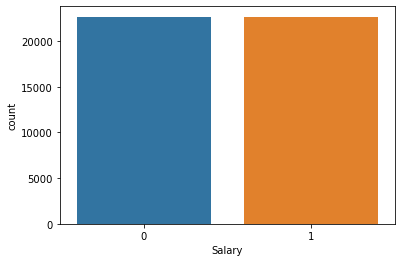

In [65]:
import seaborn as sns
sns.countplot(y_res)
import warnings
warnings.filterwarnings('ignore')

In [66]:
y_res.value_counts()

0    22653
1    22653
Name: Salary, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

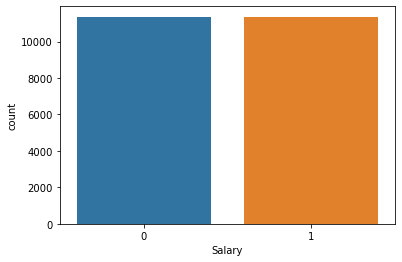

In [67]:
sns.countplot(y_tes)

In [64]:
x_tes.shape

(22720, 15)

In [41]:
y_tes.value_counts()

0    11360
1    11360
Name: Salary, dtype: int64

# Building the model

In [42]:
## Importing the laibaries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [51]:
clf = SVC()
clf = SVC(C= 0.1, gamma =0.5,kernel='rbf')
clf.fit( x_res, y_res)

SVC(C=0.1, gamma=0.5)

In [52]:
y_pred = clf.predict(x_tes)

In [53]:
acc = accuracy_score(y_tes, y_pred) * 100

In [54]:
print("Accuracy =", acc)

Accuracy = 73.40669014084507


## So our model accuracy is 73.40%

In [59]:
cm=confusion_matrix(y_tes, y_pred)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_tes,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68     11360
           1       0.67      0.91      0.77     11360

    accuracy                           0.73     22720
   macro avg       0.77      0.73      0.73     22720
weighted avg       0.77      0.73      0.73     22720



Text(42.0, 0.5, 'actual')

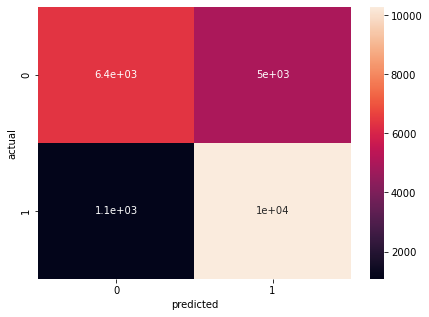

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')